In [46]:
from MieSppForce import dipoles,force,frenel, green_func
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

c_const = 299792458

In [47]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,40)

P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m
    
    

  0%|          | 0/40 [00:00<?, ?it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 40/40 [00:17<00:00,  2.30it/s]


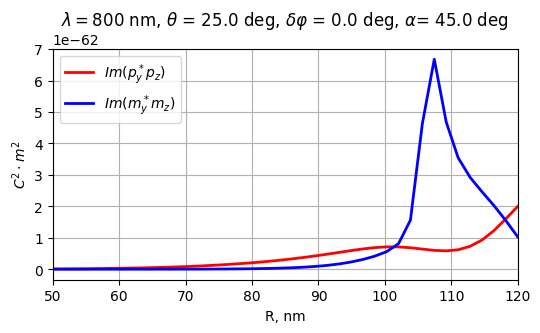

In [30]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,1])*P[:,2]), label='$Im(p_y^* p_z)$', lw=2, c='r')

plt.plot(R, np.imag(np.conj(M[:,1])*M[:,2])/c_const**2, label='$Im(m_y^* m_z)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


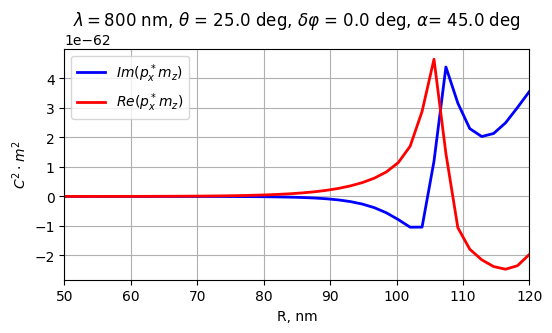

In [31]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,0])*M[:,2])/c_const, label='$Im(p_x^* m_z)$', lw=2, c='b')

plt.plot(R, np.real(np.conj(P[:,0])*M[:,2])/c_const, label='$Re(p_x^* m_z)$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()

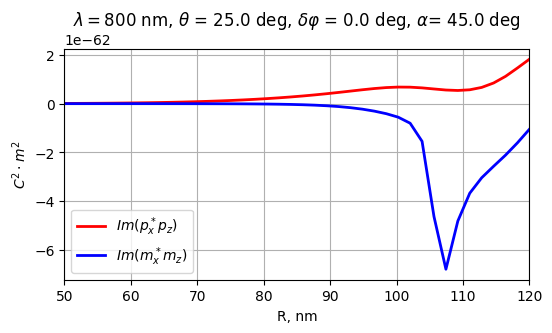

In [32]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,0])*P[:,2]), label='$Im(p_x^* p_z)$', lw=2, c='r')

plt.plot(R, np.imag(np.conj(M[:,0])*M[:,2])/c_const**2, label='$Im(m_x^* m_z)$', lw=2, c='b')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()


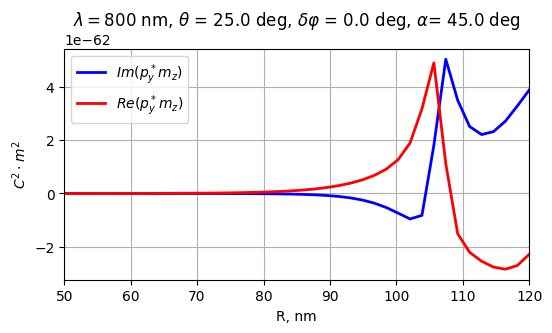

In [33]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(np.conj(P[:,1])*M[:,2])/c_const, label='$Im(p_y^* m_z)$', lw=2, c='b')

plt.plot(R, np.real(np.conj(P[:,1])*M[:,2])/c_const, label='$Re(p_y^* m_z)$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.ylabel('$C^2 \cdot m^2$')
plt.grid()
plt.legend()
plt.show()

In [52]:
eps_Si = frenel.get_interpolate('Si')
eps_Au = frenel.get_interpolate('Au')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,40)

dyrotGxzH= np.empty(len(R), dtype=complex)

dyGyzE= np.empty(len(R), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    dyGE, dyGH = green_func.dy_green_E_H(wl, point[2], eps_Au, stop=STOP)
    dyrotGE, dyrotGH = green_func.dy_rot_green_E_H(wl, point[2], eps_Au, stop=STOP)
    dyrotGxzH[i] = dyrotGH[0,2]
    dyGyzE[i] = dyGE[1,2]
    

  0%|          | 0/40 [00:00<?, ?it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 40/40 [00:06<00:00,  6.52it/s]


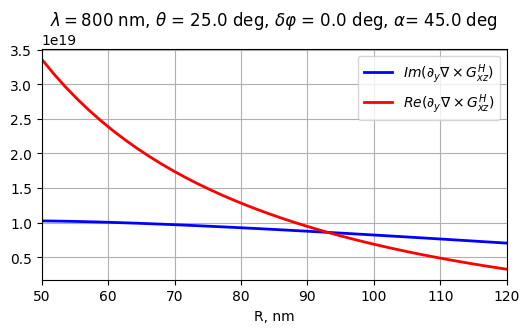

In [53]:
plt.figure(figsize=(6,3))

plt.plot(R, np.imag(dyrotGxzH), label='$Im(\partial_y \\nabla\\times G_{xz}^H)$', lw=2, c='b')

plt.plot(R, np.real(dyrotGxzH), label='$Re(\partial_y \\nabla\\times G_{xz}^H )$', lw=2, c='r')

plt.title(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, $\\alpha $= {round(a_angle*180/np.pi,2)} deg')

plt.xlim([R[0],R[-1]])
plt.xlabel('R, nm')
plt.grid()
plt.legend()
plt.show()

# 

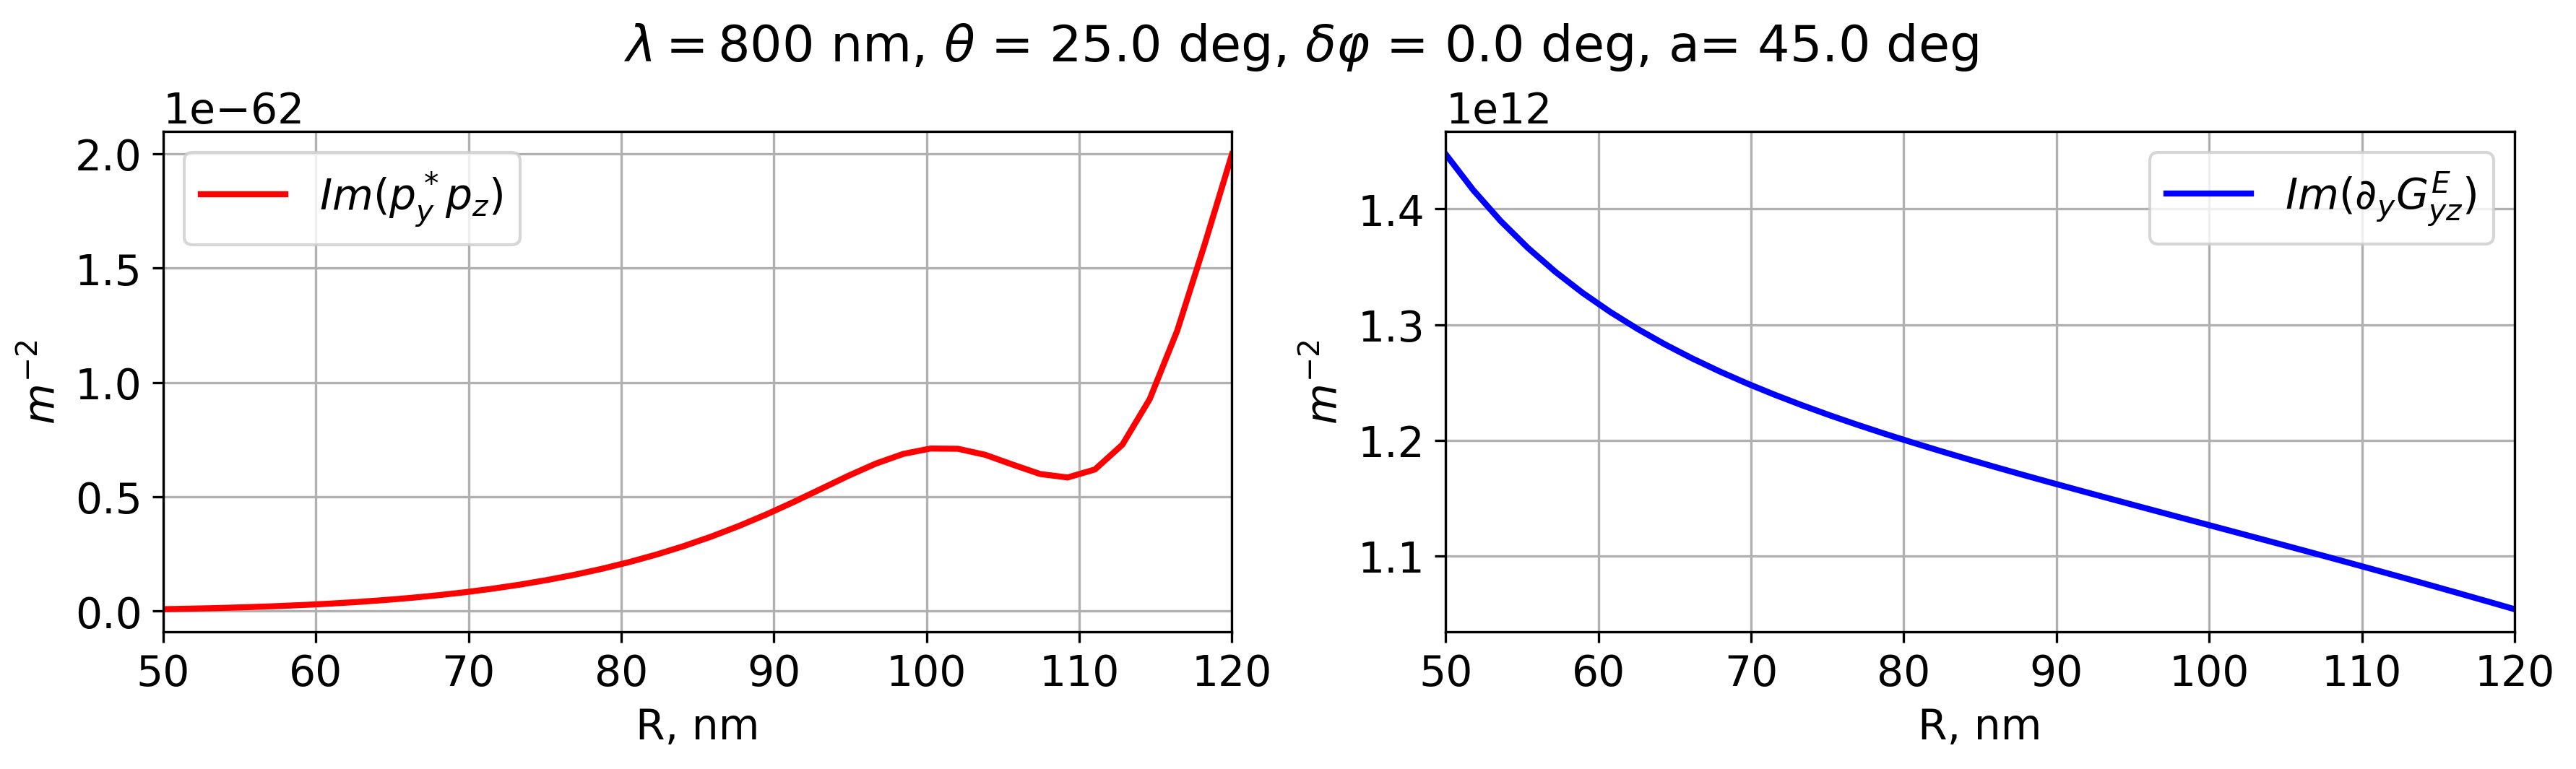

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=300)

# Plot dipole moments product
axs[0].plot(R, np.imag(np.conj(P[:,1])*P[:,2]), label='$Im(p_y^* p_z)$', lw=2, c='r')
axs[0].set_ylabel('$C^2 \cdot m^2$')
axs[0].grid()
axs[0].legend()
axs[0].set_xlim([R[0],R[-1]])
axs[0].set_xlabel('R, nm')
axs[0].set_ylabel('$m^{-2}$')
fig.suptitle(f'$\lambda = {wl}$ nm, $\\theta$ = {round(angle*180/np.pi,2)} deg, $\delta \\varphi$ = {round(phase*180/np.pi,2)} deg, a= {round(a_angle*180/np.pi,2)} deg', y=1.05)

# Plot green function component
axs[1].plot(R, np.imag(dyGyzE), label='$Im(\\partial_y  G_{yz}^E)$', lw=2, c='b')
axs[1].set_xlabel('R, nm')
axs[1].set_ylabel('$m^{-2}$')
axs[1].grid()
axs[1].set_xlim([R[0],R[-1]])
axs[1].legend()

plt.savefig(f'pypz_dyGyzE_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', bbox_inches='tight')
plt.show()
